In [1]:
from joblib import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import ma,cm
import seaborn as sns
import statsmodels.api as sm
import plot_config
from sklearn.metrics import cohen_kappa_score, accuracy_score
from imblearn.metrics import geometric_mean_score
plot_config.set_config()
plt.rcParams["image.cmap"] = "viridis"

/home/jader/Projects/meta_experiments/venv/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
experiment = 'powersupply'
name_caps = 'PowerSupply'

In [3]:
off_scores = load('../data/'+experiment+'/off_scores.joblib')
off_preds = load('../data/'+experiment+'/off_preds.joblib')
off_targets = load('../data/'+experiment+'/off_targets.joblib')

In [4]:
kappas = []
gmeans = []
accurs = []
for i in range(100):
    scores = off_scores[300+i:300+i+10]
    app = [i for i,(x,y) in enumerate(scores) if abs(x-y)>0.1]
    preds = off_preds[i][app]
    targets = off_targets[i][app]
    
    if not np.isnan(geometric_mean_score(targets, preds)):
        gmeans.append(geometric_mean_score(targets, preds))
        
    if not np.isnan(accuracy_score(targets, preds)):
        accurs.append(accuracy_score(targets, preds))
        
    if np.array_equal(preds, targets):
        kappas.append(1.0)
    else:
        kappas.append(cohen_kappa_score(targets, preds))
print(np.mean(kappas), "+-", np.std(kappas))
print(np.mean(gmeans), "+-", np.std(gmeans))
print(np.mean(accurs), "+-", np.std(accurs))

0.45987675070028017 +- 0.49388017617239144
0.4812132034355965 +- 0.48829689005691135
0.7353333333333333 +- 0.31119197361828665


/home/jader/Projects/meta_experiments/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


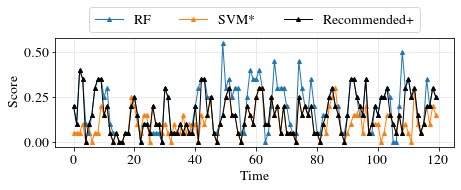

In [5]:
rf_score = load('../data/'+experiment+'/score_rf.joblib')[:120]
svm_score = load('../data/'+experiment+'/score_svm.joblib')[:120]
score_recommended = np.array(load('../data/'+experiment+'/score_reco.joblib'))[:120]
fig = plt.gcf()
fig.set_size_inches(7.14, 2)
plt.plot(rf_score, '^-', label='RF')
plt.plot(svm_score, '^-', label='SVM*')
plt.plot(score_recommended, 'k^-', label='Recommended+')
plt.xlabel('Time')
plt.ylabel('Score')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=3, fancybox=True)
plt.savefig(experiment+'_tscores.pdf', bbox_inches='tight')

In [6]:
t_importance = load('../data/'+experiment+'/importance.joblib')
t_fname = load('../data/'+experiment+'/fnames.joblib')[:-1]
dic = sorted([(k,v) for k,v in zip(t_importance, t_fname)])[-15:]
importance = [k for k,v in dic]
fname = [v for k,v in dic]
pos = np.arange(len(importance))

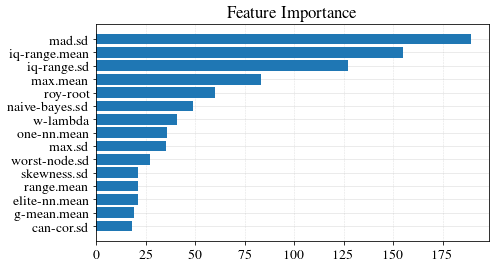

In [7]:
fig, ax1 = plt.subplots()
fig.subplots_adjust(left=0.115, right=0.88)
ax1.set_title('Feature Importance')
ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)
rects = plt.barh(pos, importance,
         align='center',
         tick_label=[x.replace('_','-') for x in fname])
fig = plt.gcf()
fig.set_size_inches(7.14, 4)
plt.savefig(experiment+'_fi.pdf', bbox_inches='tight')

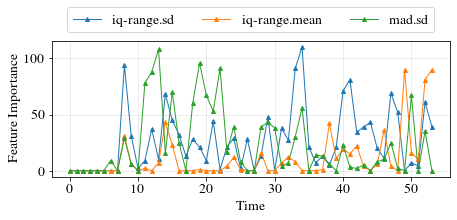

In [8]:
tfi = load('../data/'+experiment+'_ninc/tfi.joblib')
topfname = fname[-3:]
tfi = pd.DataFrame(tfi, columns=t_fname)[topfname]
tfi.rename(columns={x:x.replace('_','-') for x in topfname}, inplace=True)
ax = tfi.plot(style='^-')
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Time')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, fancybox=True)
fig = plt.gcf()
fig.set_size_inches(7.14, 2.5)
plt.savefig(experiment+'_timefi.pdf', bbox_inches='tight')

In [9]:
arange = 500
difference = np.array(load('../data/'+experiment+'/difference.joblib'))
difference_ninc = np.array(load('../data/'+experiment+'_ninc/difference.joblib'))
cum = np.cumsum(difference)[:arange]
cum_ninc = np.cumsum(difference_ninc)[:arange]
x = np.arange(arange)

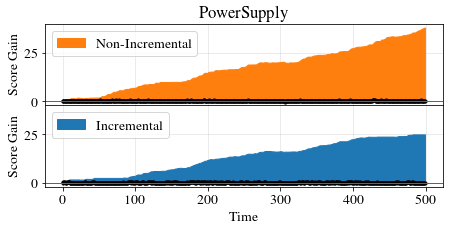

In [10]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, sharey=True, gridspec_kw={'hspace': 0})

ax1.fill_between(x, cum_ninc, 0, color='C1', label='Non-Incremental')
ax1.scatter(x, difference_ninc[:arange], s=10, c='black')
ax1.set_title(name_caps)
ax1.axhline(0)
ax1.legend(loc='upper left')
ax1.set_ylabel('Score Gain')

ax2.fill_between(x, cum, 0, color='C0', label='Incremental')
ax2.scatter(x, difference[:arange], s=10, c='black')
ax2.axhline(0)
ax2.legend(loc='upper left')
ax2.set_ylabel('Score Gain')
ax2.set_xlabel('Time')

fig = plt.gcf()
fig.set_size_inches(7.14, 3)
plt.savefig(experiment+'_cumsum.pdf', bbox_inches='tight')

In [11]:
print(cum[-10:])

[24.85 24.85 24.85 24.85 24.85 24.85 24.85 24.85 24.85 24.85]


In [12]:
mbest = np.array(load('../data/'+experiment+'/best.joblib'))
mrecommended = np.array(load('../data/'+experiment+'/recommended.joblib'))
msvm = np.array(load('../data/'+experiment+'/score_svm.joblib'))
mrf = np.array(load('../data/'+experiment+'/score_rf.joblib'))

In [13]:
print('incremental')
filtered = np.abs(msvm-mrf) > .1
print(cohen_kappa_score(mbest[filtered], mrecommended[filtered]))
print(geometric_mean_score(mbest[filtered], mrecommended[filtered]))

incremental
0.03496503496503511
0.5667603058561594


In [14]:
mbest = np.array(load('../data/'+experiment+'_ninc/best.joblib'))
mrecommended = np.array(load('../data/'+experiment+'_ninc/recommended.joblib'))
msvm = np.array(load('../data/'+experiment+'_ninc/score_svm.joblib'))
mrf = np.array(load('../data/'+experiment+'_ninc/score_rf.joblib'))

In [15]:
print('non incremental')
filtered = np.abs(msvm-mrf) > .1
print(cohen_kappa_score(mbest[filtered], mrecommended[filtered]))
print(geometric_mean_score(mbest[filtered], mrecommended[filtered]))

non incremental
0.09711499390491674
0.5897109767882723


In [16]:
metadf = load('../data/'+experiment+'/metadf.joblib')
best = np.array(load('../data/'+experiment+'/best.joblib'))
score_recommended = np.array(load('../data/'+experiment+'/score_reco.joblib'))
score_default = np.array(load('../data/'+experiment+'/score_def.joblib'))


score_recommended_ninc = np.array(load('../data/'+experiment+'_ninc/score_reco.joblib'))
score_default_ninc = np.array(load('../data/'+experiment+'_ninc/score_def.joblib'))

/home/jader/Projects/meta_experiments/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Spectral"))
  import sys
/home/jader/Projects/meta_experiments/venv/lib/python3.6/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Spectral"))


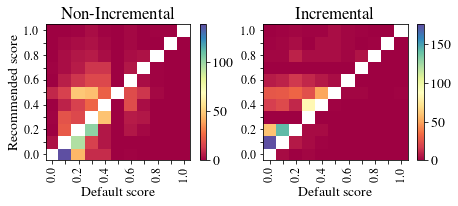

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
fig.subplots_adjust(bottom=0.25)

heatmap, xedges, yedges = np.histogram2d(score_default_ninc, score_recommended_ninc, bins=11)
mask = np.diag(np.ones(11))
masked_data = ma.masked_array(heatmap.T, mask)
cm.Spectral.set_bad(color='white', alpha=None)
im1 = ax1.pcolormesh(masked_data, cmap=cm.Spectral)
ax1.set_ylabel('Recommended score')
ax1.set_title('Non-Incremental')
ax1.set_xlabel('Default score')
ticks = ["{:.1f}".format(x) for x in np.linspace(0,1,11)]
ticksl = ["{:.1f}".format(x) if int(x*10)%2==0 else "" for x in np.linspace(0,1,11)]
ax1.set_xticks(np.arange(len(ticks))+.5, minor=False)
ax1.set_yticks(np.arange(len(ticks))+.5, minor=False)
ax1.set_xticklabels(ticksl, rotation=90, fontdict={'fontsize':12})
ax1.set_yticklabels(ticksl, fontdict={'fontsize':12})
ax1.figure.colorbar(im1, ax=ax1)


heatmap, xedges, yedges = np.histogram2d(score_default, score_recommended, bins=11)
mask = np.diag(np.ones(11))
masked_data = ma.masked_array(heatmap.T, mask)
cm.Spectral.set_bad(color='white', alpha=None)
im2 = ax2.pcolormesh(masked_data, cmap=cm.Spectral)
ax2.set_title('Incremental')
ax2.set_xlabel('Default score')
ticks = ["{:.1f}".format(x) for x in np.linspace(0,1,11)]
ticksl = ["{:.1f}".format(x) if int(x*10)%2==0 else "" for x in np.linspace(0,1,11)]
ax2.set_xticks(np.arange(len(ticks))+.5, minor=False)
ax2.set_yticks(np.arange(len(ticks))+.5, minor=False)
ax2.set_xticklabels(ticksl, rotation=90, fontdict={'fontsize':12})
ax2.set_yticklabels(ticksl, fontdict={'fontsize':12})
ax2.figure.colorbar(im2, ax=ax2)

fig = plt.gcf()
fig.set_size_inches(7.14, 3)
plt.savefig(experiment+'_score.pdf')